# Herbs Classification

Training a model that can classify images of herbs which are ginger (jahe), turmeric (kunyit), galangal (lengkuas), and aromatic ginger (kencur). The project is using the CNN algorithm in TensorFlow which will extract features in images.

## Libraries

In [54]:
import os
import cv2
import random
import shutil
from shutil import copyfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

## Preparation

Prepare directories, split data into train and validation data, make generators, and make model.

### Preparing Directories

In [8]:
# Define base dir
base_dir = 'Dataset'

source_path_jahe = os.path.join(base_dir, 'Jahe')
source_path_kunyit = os.path.join(base_dir, 'Kunyit')
source_path_lengkuas = os.path.join(base_dir, 'Lengkuas')
source_path_kencur = os.path.join(base_dir, 'Kencur')

# Checking how many images in each directories
print(f"There are {len(os.listdir(source_path_jahe))} images of jahe.")
print(f"There are {len(os.listdir(source_path_kunyit))} images of kunyit.")
print(f"There are {len(os.listdir(source_path_lengkuas))} images of lengkuas.")
print(f"There are {len(os.listdir(source_path_kencur))} images of kencur.")

There are 116 images of jahe.
There are 114 images of kunyit.
There are 112 images of lengkuas.
There are 115 images of kencur.


#### Make Sub-directories

In [12]:
# Define root directory
root_dir = 'Dataset\Herbs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and validation sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """

  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  os.makedirs(train_dir)
  os.makedirs(validation_dir)

  train_jahe_dir = os.path.join(train_dir, 'Jahe')
  train_kunyit_dir = os.path.join(train_dir, 'Kunyit')
  train_lengkuas_dir = os.path.join(train_dir, 'Lengkuas')
  train_kencur_dir = os.path.join(train_dir, 'Kencur')

  os.makedirs(train_jahe_dir)
  os.makedirs(train_kunyit_dir)
  os.makedirs(train_lengkuas_dir)
  os.makedirs(train_kencur_dir)
  
  validation_jahe_dir = os.path.join(validation_dir, 'Jahe')
  validation_kunyit_dir = os.path.join(validation_dir, 'Kunyit')
  validation_lengkuas_dir = os.path.join(validation_dir, 'Lengkuas')
  validation_kencur_dir = os.path.join(validation_dir, 'Kencur')

  os.makedirs(validation_jahe_dir)
  os.makedirs(validation_kunyit_dir)
  os.makedirs(validation_lengkuas_dir)
  os.makedirs(validation_kencur_dir)

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

### Split Data

In [13]:
# Testi create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

Dataset\Herbs\training
Dataset\Herbs\validation
Dataset\Herbs\training\Jahe
Dataset\Herbs\training\Kencur
Dataset\Herbs\training\Kunyit
Dataset\Herbs\training\Lengkuas
Dataset\Herbs\validation\Jahe
Dataset\Herbs\validation\Kencur
Dataset\Herbs\validation\Kunyit
Dataset\Herbs\validation\Lengkuas


In [14]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    """
    Splits the data into train and validation sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """

    # Count files in source directory
    source_dir_files_count = len(os.listdir(SOURCE_DIR))
    # Define the size of train data
    train_files_count = round(source_dir_files_count * SPLIT_SIZE)
    # Randomize the data
    shuffled_list = random.sample(os.listdir(SOURCE_DIR), source_dir_files_count)

    for filename in shuffled_list[:train_files_count]:
        filesource = os.path.join(SOURCE_DIR, filename)
        filedest = os.path.join(TRAINING_DIR, filename)
        if os.path.getsize(filesource) == 0:
            print("{} filename is zero length, so ignoring.".format(filename))
        else:
            copyfile(filesource, filedest)

    for filename in shuffled_list[train_files_count:]:
        filesource = os.path.join(SOURCE_DIR, filename)
        filedest = os.path.join(VALIDATION_DIR, filename)
        if os.path.getsize(filesource) == 0:
            print("{} filename is zero length, so ignoring.".format(filename))
        else:
            copyfile(filesource, filedest)

In [32]:
# Test split_data function

# Define paths to original dataset
JAHE_SOURCE_DIR = 'Dataset\\Jahe'
KUNYIT_SOURCE_DIR = 'Dataset\\Kunyit'
LENGKUAS_SOURCE_DIR = 'Dataset\\Lengkuas'
KENCUR_SOURCE_DIR = 'Dataset\\Kencur'

TRAINING_DIR = 'Dataset\\Herbs\\training\\'
VALIDATION_DIR = 'Dataset\\Herbs\\validation\\'

TRAINING_JAHE_DIR = os.path.join(TRAINING_DIR, 'Jahe\\')
VALIDATION_JAHE_DIR = os.path.join(VALIDATION_DIR, 'Jahe\\')

TRAINING_KUNYIT_DIR = os.path.join(TRAINING_DIR, 'Kunyit\\')
VALIDATION_KUNYIT_DIR = os.path.join(VALIDATION_DIR, 'Kunyit\\')

TRAINING_LENGKUAS_DIR = os.path.join(TRAINING_DIR, 'Lengkuas\\')
VALIDATION_LENGKUAS_DIR = os.path.join(VALIDATION_DIR, 'Lengkuas\\')

TRAINING_KENCUR_DIR = os.path.join(TRAINING_DIR, 'Kencur\\')
VALIDATION_KENCUR_DIR = os.path.join(VALIDATION_DIR, 'Kencur\\')

# Empty directories in case this cell executed multiple times
# For train dir
if len(os.listdir(TRAINING_JAHE_DIR)) > 0:
  for file in os.scandir(TRAINING_JAHE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KUNYIT_DIR)) > 0:
  for file in os.scandir(TRAINING_KUNYIT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LENGKUAS_DIR)) > 0:
  for file in os.scandir(TRAINING_LENGKUAS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KENCUR_DIR)) > 0:
  for file in os.scandir(TRAINING_KENCUR_DIR):
    os.remove(file.path)

# For validation dir
if len(os.listdir(VALIDATION_JAHE_DIR)) > 0:
  for file in os.scandir(VALIDATION_JAHE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KUNYIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_KUNYIT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LENGKUAS_DIR)) > 0:
  for file in os.scandir(VALIDATION_LENGKUAS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KENCUR_DIR)) > 0:
  for file in os.scandir(VALIDATION_KENCUR_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
split_data(JAHE_SOURCE_DIR, TRAINING_JAHE_DIR, VALIDATION_JAHE_DIR, split_size)
split_data(KUNYIT_SOURCE_DIR, TRAINING_KUNYIT_DIR, VALIDATION_KUNYIT_DIR, split_size)
split_data(LENGKUAS_SOURCE_DIR, TRAINING_LENGKUAS_DIR, VALIDATION_LENGKUAS_DIR, split_size)
split_data(KENCUR_SOURCE_DIR, TRAINING_KENCUR_DIR, VALIDATION_KENCUR_DIR, split_size)

# Check how many files in original images directories
print(f"\n\nOriginal jahe's directory has {len(os.listdir(JAHE_SOURCE_DIR))} images")
print(f"Original kunyit's directory has {len(os.listdir(KUNYIT_SOURCE_DIR))} images")
print(f"Original lengkuas' directory has {len(os.listdir(LENGKUAS_SOURCE_DIR))} images")
print(f"Original kencur's directory has {len(os.listdir(KENCUR_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_JAHE_DIR))} images of jahe for training")
print(f"There are {len(os.listdir(TRAINING_KUNYIT_DIR))} images of kunyit for training")
print(f"There are {len(os.listdir(TRAINING_LENGKUAS_DIR))} images of lengkuas for training")
print(f"There are {len(os.listdir(TRAINING_KENCUR_DIR))} images of kencur for training")
print(f"There are {len(os.listdir(VALIDATION_JAHE_DIR))} images of jahe for validation")
print(f"There are {len(os.listdir(VALIDATION_KUNYIT_DIR))} images of kunyit for validation")
print(f"There are {len(os.listdir(VALIDATION_LENGKUAS_DIR))} images of lengkuas for validation")
print(f"There are {len(os.listdir(VALIDATION_KENCUR_DIR))} images of kencur for validation")



Original jahe's directory has 115 images
Original kunyit's directory has 114 images
Original lengkuas' directory has 112 images
Original kencur's directory has 115 images

There are 104 images of jahe for training
There are 103 images of kunyit for training
There are 101 images of lengkuas for training
There are 104 images of kencur for training
There are 11 images of jahe for validation
There are 11 images of kunyit for validation
There are 11 images of lengkuas for validation
There are 11 images of kencur for validation


Sample jahe image:


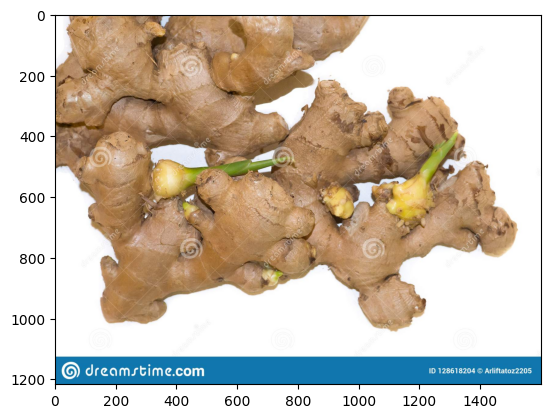


Sample kunyit image:


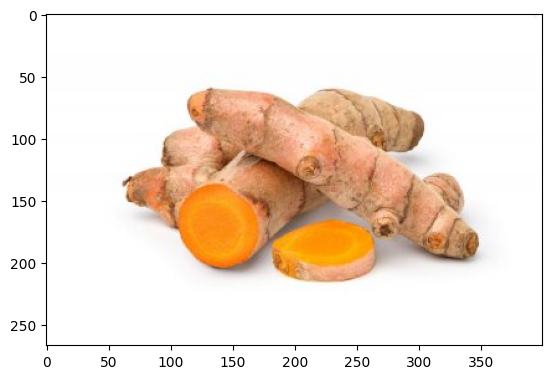


Sample lengkuas image:


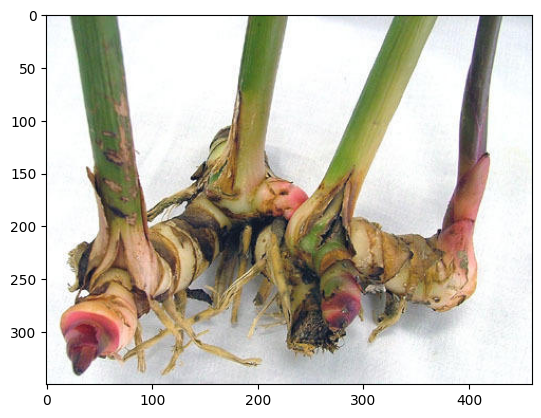


Sample kencur image:


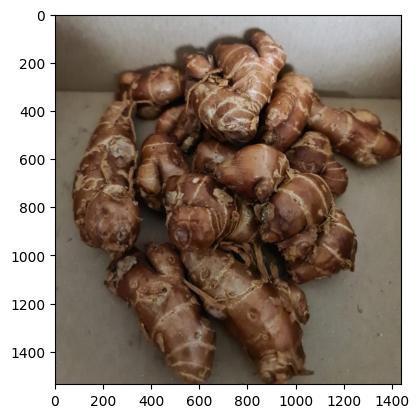

In [42]:
# Take a look at a sample image of each one of the classes

print("Sample jahe image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_JAHE_DIR, os.listdir(TRAINING_JAHE_DIR)[0])}"))
plt.show()

print("\nSample kunyit image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_KUNYIT_DIR, os.listdir(TRAINING_KUNYIT_DIR)[0])}"))
plt.show()

print("\nSample lengkuas image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_LENGKUAS_DIR, os.listdir(TRAINING_LENGKUAS_DIR)[0])}"))
plt.show()

print("\nSample kencur image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_KENCUR_DIR, os.listdir(TRAINING_KENCUR_DIR)[0])}"))
plt.show()

### Make generators

The generators will yield batches of images, both for training and validation.

In [33]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=30,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=30,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [34]:
# Test the generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 412 images belonging to 4 classes.
Found 44 images belonging to 4 classes.


### Make Model

In [35]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
  ])

  
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

## Training

In [37]:
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
14/14 [==============================] - 14s 929ms/step - loss: 3.5580 - accuracy: 0.2670 - val_loss: 1.3771 - val_accuracy: 0.2273
Epoch 2/20
14/14 [==============================] - 10s 721ms/step - loss: 1.3739 - accuracy: 0.3107 - val_loss: 1.3437 - val_accuracy: 0.4091
Epoch 3/20
14/14 [==============================] - 10s 713ms/step - loss: 1.3506 - accuracy: 0.3665 - val_loss: 1.4758 - val_accuracy: 0.3864
Epoch 4/20
14/14 [==============================] - 10s 736ms/step - loss: 1.4607 - accuracy: 0.3350 - val_loss: 1.3886 - val_accuracy: 0.2500
Epoch 5/20
14/14 [==============================] - 10s 725ms/step - loss: 1.3025 - accuracy: 0.4005 - val_loss: 1.2730 - val_accuracy: 0.3636
Epoch 6/20
14/14 [==============================] - 10s 715ms/step - loss: 1.2966 - accuracy: 0.3689 - val_loss: 1.2551 - val_accuracy: 0.3636
Epoch 7/20
14/14 [==============================] - 10s 709ms/step - loss: 1.2266 - accuracy: 0.4078 - val_loss: 1.2318 - val_accuracy: 0.4091

## Evaluation

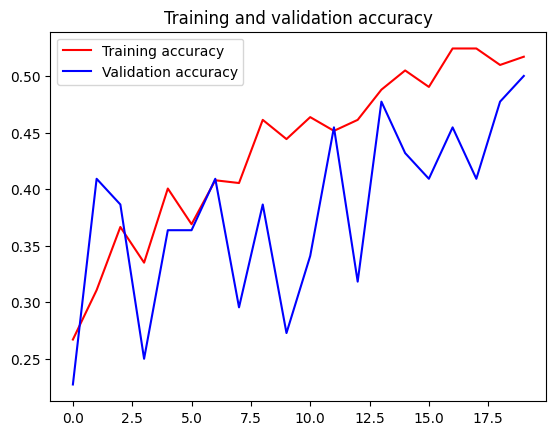

<Figure size 640x480 with 0 Axes>

In [43]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()